montar o df\
-ano gerado (fácil)\
-ano retirando os dias com dados faltantes (fácil mas n muito bom)\
-ano retirando dias com dados faltantes em horarios significativos (difícil mas bom)

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
pd.set_option('display.max_rows', 1000)

In [58]:
df=pd.DataFrame([])

nome_meses=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

for y in range (4,10):  # 4 de 201'4' e 10 significa que vai até o 9 de 201'9'
    for m in nome_meses:
        c=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\201{}\201{}{}.xlsx'.format(y,y,m))
        df=df.append(c)
df.set_index('Unnamed: 0',inplace=True)
B=pd.date_range(start='2014-01-01 00:00:00', end='2019-12-31 23:50:00', freq='10min')
df.index=B ## Para utilizar o index em outro conjunto de dados que criarmos

### Ano gerado
-esse ano teve problemas: os dados se concentraram em um período do ano, pois os dias em que houve chuva foram aproximados dos mesmos dias em outros anos que não houve chuva

In [54]:
a=df.loc[(df.index.strftime('%y')=='16')]
a=a.drop(a.loc[a.index.strftime('%m:%d')=='02:29'].index)

df1=pd.DataFrame([])

df1['2014']=df.loc[df.index.strftime('%y')=='14'].SolarRad.values
df1['2015']=df.loc[df.index.strftime('%y')=='15'].SolarRad.values
df1['2016']=a.SolarRad.values
df1['2017']=df.loc[df.index.strftime('%y')=='17'].SolarRad.values
df1['2018']=df.loc[df.index.strftime('%y')=='18'].SolarRad.values
df1['2019']=df.loc[df.index.strftime('%y')=='19'].SolarRad.values

df1['MeanSolarRad']=df1.mean(axis=1)

C=pd.date_range(start='2050-01-01 00:00:00', end='2050-12-31 23:50:00', freq='10min')
C=C.strftime('%b-%d %H:%M')
df1.index = C

Mean=df1.MeanSolarRad
Mean.index=pd.date_range(start='2014-01-01 00:00:00', end='2014-12-31 23:50:00', freq='10min')

H=(Mean.groupby(Mean.index.strftime('%m-%d')).sum()/6).values             #agora os dados estarão em Wh/m2d
H=pd.DataFrame(H)

b=df.loc[(df.index.strftime('%y')=='16')]
b=a.drop(a.loc[a.index.strftime('%m:%d')=='02:29'].index)

df2=pd.DataFrame([])

df2['2014']=df.loc[df.index.strftime('%y')=='14'].TempOut.values/1000
df2['2015']=df.loc[df.index.strftime('%y')=='15'].TempOut.values/1000
df2['2016']=a.TempOut.values/1000
df2['2017']=df.loc[df.index.strftime('%y')=='17'].TempOut.values/1000
df2['2018']=df.loc[df.index.strftime('%y')=='18'].TempOut.values/1000
df2['2019']=df.loc[df.index.strftime('%y')=='19'].TempOut.values/1000

df2.index = pd.date_range(start='2014-01-01 00:00:00', end='2014-12-31 23:50:00', freq='10min')

df2['2018'].loc[df2['2018']>40]=np.nan
df2['2019'].loc[df2['2019']>40]=np.nan

filt=df2.index.strftime('%Y-%m-%d')
dT=(df2.groupby(filt).max()).mean(axis=1)-(df2.groupby(filt).min()).mean(axis=1)

display(df1)
display(H)
display(dT)

,2014,2015,2016,2017,2018,2019,MeanSolarRad
Jan-01 00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jan-01 00:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Dec-31 23:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dec-31 23:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dec-31 23:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dec-31 23:40,0.0,0.0,0.0,0.0,0.0,NaN,0.0


,0
0,6899.038889
1,6185.977778
2,6987.886111
3,6290.352778
4,6217.755556
5,6329.972222
6,5743.366667
7,6107.266667
8,5979.916667
9,5426.738889


2014-01-01    4.283333
2014-01-02    4.900000
2014-01-03    5.000000
2014-01-04    5.100000
2014-01-05    4.433333
2014-01-06    5.266667
2014-01-07    4.816667
2014-01-08    5.116667
2014-01-09    4.850000
2014-01-10    4.866667
2014-01-11    5.600000
2014-01-12    5.550000
2014-01-13    5.216667
2014-01-14    4.933333
2014-01-15    5.600000
2014-01-16    5.033333
2014-01-17    5.483333
2014-01-18    5.416667
2014-01-19    5.400000
2014-01-20    5.266667
2014-01-21    4.533333
2014-01-22    4.933333
2014-01-23    5.416667
2014-01-24    4.483333
2014-01-25    4.950000
2014-01-26    5.266667
2014-01-27    5.150000
2014-01-28    5.366667
2014-01-29    5.650000
2014-01-30    5.066667
2014-01-31    5.683333
2014-02-01    4.566667
2014-02-02    5.116667
2014-02-03    5.183333
2014-02-04    5.383333
2014-02-05    5.033333
2014-02-06    5.383333
2014-02-07    5.400000
2014-02-08    5.400000
2014-02-09    6.333333
2014-02-10    5.600000
2014-02-11    6.000000
2014-02-12    6.266667
2014-02-13 

### Ano retirando dias com dados faltantes em horarios significativos (difícil mas bom)

dt_inteiro
dt_diurno

In [4]:
filt1=(df.index.strftime('%H:%M')>='04:40')&(df.index.strftime('%H:%M')<='17:40')
filt2=(df.index.strftime('%H:%M')>='07:00')&(df.index.strftime('%H:%M')<='16:20')

dfd=df.loc[filt1]
df_p_analise=df.loc[filt2] 

#primeiro filtro a gente vai eliminar dias com 6 ou mais dados faltantes no periodo do filt2

# o restante vamos fazer uma análise para estimar o quanto se perde e chegar em 5%

primeiro_filtro=pd.DataFrame(df_p_analise.loc[df_p_analise.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().sort_index(),columns=['valores'])
primeiro_filtro=primeiro_filtro.loc[primeiro_filtro.valores>5].index
primeiro_filtro

dfd=dfd.drop(dfd.loc[dfd.index.strftime('%y-%m-%d').isin(primeiro_filtro)].index)

#decidimos não aplicar um segundo filtro, pois mesmo nos dias em que havia muitos dados faltantes, depois do primeiro filtro,
#ainda se via utilidade e, pelo q observamos, a soma dos dados perdidos não chegariam perto de 5% do total 

In [542]:
#dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts()

In [543]:
#filt3=(dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].index.strftime('%H:%M')>='09:00')&(dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].index.strftime('%H:%M')<='14:40')
#dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].loc[filt3].loc[dfd.loc[dfd.index.strftime('%y-%m-%d').isin(dfd.loc[dfd.FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts().index)].loc[filt3].FilledData=='Faltante'].index.strftime('%y-%m-%d').value_counts()

In [55]:
H=dfd.SolarRad.groupby(dfd.index.strftime('%y-%m-%d')).sum()/6

def f2c(x):
    r=x
    if r>40:
        r = (r-32)*5/9
    else: r=r
    return r

dfd.TempOut=dfd.TempOut/1000
dfd.TempOut=(dfd.TempOut).map(f2c)

Max=pd.DataFrame(dfd.TempOut.groupby(dfd.index.strftime('%y-%m-%d')).max())

Min=pd.DataFrame(dfd.TempOut.groupby(dfd.index.strftime('%y-%m-%d')).min())

dT=Max-Min

\

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Radiação ET:



\\

continuar:
    -pegar outro arquivo python para calcular a radiação et com aquelas equações,criar planilha e ler aqui, pra n precisar poluir
    essa célula
    -comparar radETSite com radETCalc
    -decidir qual usar; Se ambas estiverem muito proximas, optar pela que a gente calculou

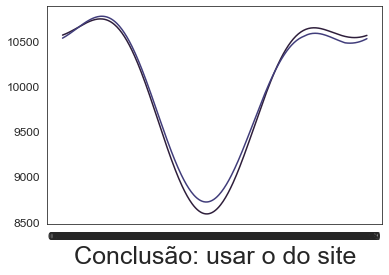

In [545]:
radETSite=pd.read_excel(r'C:\Users\Alexandro\Desktop\Matérias\Projeto\RadETpegueinosite.xlsx')  #para um ano
radETSite.index=pd.date_range(start='2050-01-01 00:00:00', end='2050-12-31 23:50:00', freq='1h')
radETSite.drop(['Date','Time'],inplace=True,axis=1)
radETSite=radETSite.groupby(radETSite.index.strftime('%m-%d')).sum()

radETCalc=pd.read_excel(r'C:\Users\Alexandro\Desktop\Matérias\Projeto\radETCalc.xlsx')
radETCalc.index=pd.date_range(start='2050-01-01 00:00:00', end='2050-12-31 23:50:00', freq='1d')
radETCalc=radETCalc.groupby(radETCalc.index.strftime('%m-%d')).sum()
radETCalc.drop(['Unnamed: 0'],inplace=True,axis=1)

#display(radETSite)
#display(radETCalc)
plt.plot(radETCalc)
plt.plot(radETSite)
plt.xlabel('Conclusão: usar o do site')
plt.show()

In [6]:
radETSite6=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\radet2014-2019(10min).xlsx')
radETSite6.index=pd.date_range(start='2014-01-01 00:00:00', end='2019-12-31 23:50:00', freq='10min')
radETSite6.drop(['Date','Time'],inplace=True,axis=1)
radETSite6=radETSite6.groupby(radETSite6.index.strftime('%y-%m-%d')).sum()/6
radETSite6

,ETR global
14-01-01,10594.542650
14-01-02,10598.694750
14-01-03,10603.005783
14-01-04,10607.471633
14-01-05,10612.081067
...,...
19-12-27,10575.996367
19-12-28,10578.702550
19-12-29,10581.839733
19-12-30,10585.334050


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

fazer df no formato:\
-H,Ho,KT,dT

In [547]:
#pro ano gerado

#H.index=Ho.index
#dT.index=Ho.index
#dff=pd.DataFrame(H)
#dff['Ho']=Ho
#dff['dT']=dT
#dff.columns=['H','Ho','dT']
#dff['KT']=dff['H']/dff['Ho']
#dff' ' '

In [7]:
#pros anos com filtro
dff=pd.DataFrame(H)
dff['Ho']=radETSite6
dff['dT']=dT
dff.columns=['H','Ho','dT']
dff['KT']=dff['H']/dff['Ho']
dff

,H,Ho,dT,KT
14-01-01,7339.333333,10594.542650,4.3,0.692747
14-01-02,6873.166667,10598.694750,4.2,0.648492
14-01-03,7160.333333,10603.005783,4.7,0.675312
14-01-04,5233.166667,10607.471633,6.0,0.493347
14-01-05,5031.166667,10612.081067,6.0,0.474098
...,...,...,...,...
19-12-27,6919.833333,10575.996367,4.3,0.654296
19-12-28,7264.833333,10578.702550,4.4,0.686741
19-12-29,6979.166667,10581.839733,4.3,0.659542
19-12-30,5832.833333,10585.334050,4.4,0.551030


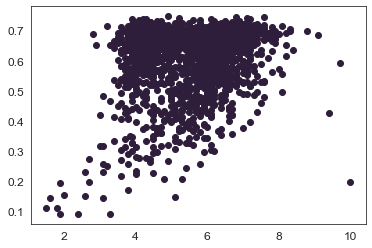

In [549]:
plt.scatter(dff.dT,dff.KT)

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Análise\
-r_2 do kt\
-r_2 do h e h predito\
-erros (RMSE, MAE, etc...)

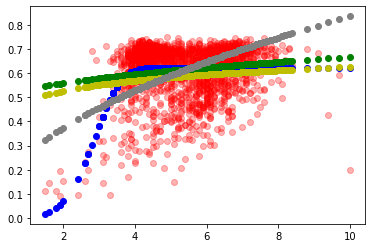

In [8]:
Alt = 38

def KTBC(x,A,B,C):
    return A*(1-np.exp(-B*x**C))

def KTHarg(x,A,B):
    return A*(x)**(0.5) + B

def KTChen(x,A,B):
    return A*np.log(x) + B

def KTAnand(x,A):
    return A*(1+2.7*10**(-5)*Alt)*x**(0.5)



gBC = [1,0,0]
gH = [1,1]
gChen = [1,1]
gAnand = [1]

n = len(dff.KT)
yBC = np.empty(n)
yH = np.empty(n)
yChen = np.empty(n)
yAnand = np.empty(n)

from scipy.optimize import curve_fit

cBC, covBC = curve_fit(KTBC,dff.dT,dff.KT,gBC)
cH, covH = curve_fit(KTHarg,dff.dT,dff.KT,gH)
cChen, covChen = curve_fit(KTChen,dff.dT,dff.KT,gChen)
cAnand, covAnand = curve_fit(KTAnand,dff.dT,dff.KT,gAnand)

for i in range (n):
    yBC[i] = KTBC(dff.dT[i],cBC[0],cBC[1],cBC[2])
    yH[i] = KTHarg(dff.dT[i],cH[0],cH[1])
    yChen[i] = KTChen(dff.dT[i],cH[0],cChen[1])
    yAnand[i] = KTAnand(dff.dT[i],cAnand[0])

plt.scatter(dff.dT,dff.KT,color='r',alpha=0.3)
plt.scatter(dff.dT,yBC,color='b')
plt.scatter(dff.dT,yH,color='g')
plt.scatter(dff.dT,yChen,color='y')
plt.scatter(dff.dT,yAnand,color='grey')

plt.show()


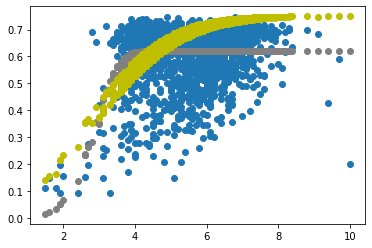

In [9]:
def KTWeiss(x,B):
    return 0.75*(1-np.exp(-B*x**2/(dff.Ho.loc[x.index]*3600/10**6)))

def KTGoodin(x,A,B,C):
    return A - A*np.exp(-B*x**C/(dff.Ho.loc[x.index]*3600/10**6))

gGoodin = [0.75,0,2]
gWeiss = [1.5]

yGoodin = np.empty(n)
yWeiss = np.empty(n)

cGoodin, covGoodin = curve_fit(KTGoodin,dff.dT,dff.KT)
cWeiss, covWeiss = curve_fit(KTWeiss,dff.dT,dff.KT)

yGoodin = KTGoodin(dff.dT,cGoodin[0],cGoodin[1],cGoodin[2])
yWeiss = KTWeiss(dff.dT,cWeiss[0])

    
plt.scatter(dff.dT,dff.KT)
plt.scatter(dff.dT,yGoodin,color='grey')
plt.scatter(dff.dT,yWeiss,color='y')


In [10]:
dff.index = pd.to_datetime(dff.index, format = '%y-%m-%d')

In [11]:
dTm = dff.dT.groupby(dff.index.strftime('%y-%m')).mean()
dTm.index = pd.to_datetime(dTm.index, format = '%y-%m')

In [12]:
dff['dTm'] = np.zeros(len(dff.dT))
for i in dTm.index.strftime('%y-%m'):
    dff['dTm'][dff.index.strftime('%y-%m')==i] = np.repeat(dTm[dTm.index.strftime('%y-%m')==i],len(dff['dTm'][dff.index.strftime('%y-%m')==i]))

In [555]:
dff.head(1000)

,H,Ho,dT,KT,dTm
2014-01-01,7339.333333,10594.542650,4.3,0.692747,5.035484
2014-01-02,6873.166667,10598.694750,4.2,0.648492,5.035484
2014-01-03,7160.333333,10603.005783,4.7,0.675312,5.035484
2014-01-04,5233.166667,10607.471633,6.0,0.493347,5.035484
2014-01-05,5031.166667,10612.081067,6.0,0.474098,5.035484
2014-01-06,5800.833333,10616.826567,5.7,0.546381,5.035484
2014-01-07,3615.000000,10621.697283,3.7,0.340341,5.035484
2014-01-08,6892.833333,10626.685733,6.5,0.648634,5.035484
2014-01-09,6212.000000,10631.778150,4.3,0.584286,5.035484
2014-01-10,6197.000000,10637.101150,4.8,0.582584,5.035484


In [556]:
#def KTDC(x,A,B,C):
#    return A*(1-np.exp(-B*x**C/(dff.dTm.loc[x.index])))

#gDC = [0.75,1,1]

#n = len(dff.KT)

#yDC = np.empty(n)

#cDC, covDC = curve_fit(KTDC,dff.dT,dff.KT,gDC)

#yDC = KTDC(dff.dT,cDC[0],cDC[1],cDC[2])

#plt.scatter(dff.dT,dff.KT)
#plt.scatter(dff.dT,yDC,color='grey')

In [557]:
#gDC = [0.75,1,1]
#KTDC(dff.dT,*gDC)

In [558]:
dff

,H,Ho,dT,KT,dTm
2014-01-01,7339.333333,10594.542650,4.3,0.692747,5.035484
2014-01-02,6873.166667,10598.694750,4.2,0.648492,5.035484
2014-01-03,7160.333333,10603.005783,4.7,0.675312,5.035484
2014-01-04,5233.166667,10607.471633,6.0,0.493347,5.035484
2014-01-05,5031.166667,10612.081067,6.0,0.474098,5.035484
...,...,...,...,...,...
2019-12-27,6919.833333,10575.996367,4.3,0.654296,4.506452
2019-12-28,7264.833333,10578.702550,4.4,0.686741,4.506452
2019-12-29,6979.166667,10581.839733,4.3,0.659542,4.506452
2019-12-30,5832.833333,10585.334050,4.4,0.551030,4.506452


### r2

In [13]:
from sklearn.metrics import r2_score
print('R^2: ', r2_score(dff.H,yBC*dff.Ho))
print('R^2: ', r2_score(dff.H,yH*dff.Ho))

R^2:  0.3032150535913405
R^2:  0.21305222065880347


In [14]:
correlation_matrix = np.corrcoef(dff.H,yH*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2H = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yBC*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2BC = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yChen*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2Chen = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yGoodin.values*dff.Ho.values)
correlation_xy = correlation_matrix[0,1]
r2Goodin = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yWeiss.values*dff.Ho.values)
correlation_xy = correlation_matrix[0,1]
r2Weiss = correlation_xy**2

correlation_matrix = np.corrcoef(dff.H,yAnand*dff.Ho)
correlation_xy = correlation_matrix[0,1]
r2Anand = correlation_xy**2


print(r2BC)
print(r2H)
print(r2Chen)
print(r2Goodin)
print(r2Weiss)
print(r2Anand)

0.30368088055212195
0.22569331096143183
0.23053978066783548
0.30606369141940915
0.06150820536694167
0.08338095670154125


### MAE

In [15]:
from sklearn.metrics import mean_absolute_error

MAE_BC=mean_absolute_error((dff.H),(yBC*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Harg=mean_absolute_error((dff.H),(yH*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Chen=mean_absolute_error((dff.H),(yChen*dff.Ho), multioutput='raw_values')*3600/10**6

MAE_Goodin=mean_absolute_error((dff.H),(yGoodin.values*dff.Ho.values), multioutput='raw_values')*3600/10**6

MAE_Weiss=mean_absolute_error((dff.H),(yWeiss.values*dff.Ho.values), multioutput='raw_values')*3600/10**6

MAE_Anand=mean_absolute_error((dff.H),(yAnand*dff.Ho), multioutput='raw_values')*3600/10**6

print(MAE_BC)
print(MAE_Harg)
print(MAE_Chen)
print(MAE_Goodin)
print(MAE_Weiss)
print(MAE_Anand)


[2.72477811]
[2.89535177]
[3.27846019]
[2.71819588]
[3.68187746]
[3.41004072]


### RMSE

In [16]:
from sklearn.metrics import mean_squared_error

RMSE_Harg = mean_squared_error((dff.H),(yH*dff.Ho), squared=False)*3600/10**6

RMSE_BC = mean_squared_error((dff.H),(yBC*dff.Ho), squared=False)*3600/10**6

RMSE_Chen = mean_squared_error((dff.H),(yChen*dff.Ho), squared=False)*3600/10**6

RMSE_Weiss = mean_squared_error((dff.H),(yWeiss.values*dff.Ho.values), squared=False)*3600/10**6

RMSE_Goodin = mean_squared_error((dff.H),(yGoodin.values*dff.Ho.values), squared=False)*3600/10**6

RMSE_Anand = mean_squared_error((dff.H),(yAnand*dff.Ho), squared=False)*3600/10**6

print(RMSE_BC)
print(RMSE_Harg)
print(RMSE_Chen)
print(RMSE_Goodin)
print(RMSE_Weiss)
print(RMSE_Anand)

3.5678095519884585
3.7916238051575437
3.9354475871937638
3.5619167283466027
4.654978170982553
4.252413600780455


In [563]:
yWeiss*dff.Ho

2001-01-14   NaN
2001-01-15   NaN
2001-01-16   NaN
2001-01-17   NaN
2001-01-18   NaN
              ..
2031-12-15   NaN
2031-12-16   NaN
2031-12-17   NaN
2031-12-18   NaN
2031-12-19   NaN
Length: 3535, dtype: float64

### NSE

In [17]:
import hydroeval as he
NSE_BC = he.nse((yBC*dff.Ho*3600/10**6).values,dff.H.values*3600/10**6)
NSE_Harg = he.nse((yH*dff.Ho*3600/10**6).values,dff.H.values*3600/10**6)
NSE_Chen = he.nse((yChen*dff.Ho*3600/10**6).values,dff.H.values*3600/10**6)
NSE_Goodin = he.nse((yGoodin*dff.Ho.values*3600/10**6).values,dff.H.values*3600/10**6)
NSE_Weiss = he.nse((yWeiss*dff.Ho.values*3600/10**6).values,dff.H.values*3600/10**6)
NSE_Anand = he.nse((yAnand*dff.Ho*3600/10**6).values,dff.H.values*3600/10**6)

print(NSE_BC)
print(NSE_Harg)
print(NSE_Chen)
print(NSE_Goodin)
print(NSE_Weiss)
print(NSE_Anand)

0.3032150535913405
0.21305222065880347
0.15221896473913066
0.30551486239753944
-0.18612573610850758
0.010156743519233125


In [18]:
tabela_erros=pd.DataFrame([],index=['BC','Harg','Chen','Goodin','Weiss','Anand'],columns=['r2','NSE','MAE','RMSE'])
tabela_erros['r2']=[r2BC,r2H,r2Chen,r2Goodin,r2Weiss,r2Anand]
tabela_erros['NSE']=[NSE_BC,NSE_Harg,NSE_Chen,NSE_Goodin,NSE_Weiss,NSE_Anand]
tabela_erros['MAE']=[float(MAE_BC),float(MAE_Harg),float(MAE_Chen),float(MAE_Goodin),float(MAE_Weiss),float(MAE_Anand)]
tabela_erros['RMSE']=[RMSE_BC,RMSE_Harg,RMSE_Chen,RMSE_Goodin,RMSE_Weiss,RMSE_Anand]

In [19]:
tabela_erros.drop(['Weiss'],inplace=True)
tabela_erros

,r2,NSE,MAE,RMSE
BC,0.303681,0.303215,2.724778,3.567810
Harg,0.225693,0.213052,2.895352,3.791624
Chen,0.230540,0.152219,3.278460,3.935448
Goodin,0.306064,0.305515,2.718196,3.561917
Anand,0.083381,0.010157,3.410041,4.252414


### continuar daqui
-tabela dos erros

In [20]:
tabela_de_coefs = pd.DataFrame([],columns=['BC','Harg','Chen','Goodin','Weiss','Anand'],index=['a','b','c'])
tabela_de_coefs['BC']=cBC
tabela_de_coefs.iloc[0:2,1]=cH
tabela_de_coefs.iloc[0:2,2]=cChen
tabela_de_coefs['Goodin']=cGoodin
tabela_de_coefs.iloc[0,4]=cWeiss
tabela_de_coefs.iloc[0,5]=cAnand

In [24]:
tabela_de_coefs=tabela_de_coefs.replace(np.nan,'-').T

In [25]:
tabela_de_coefs.drop(['Weiss','Anand'])

,a,b,c
BC,0.620653,0.0035999,5.07153
Harg,0.0615836,0.471578,-
Chen,0.0786622,0.483123,-
Goodin,0.620743,0.0858861,5.38974


In [26]:
dff.loc['2014-01'].H.mean()

6216.021505376346

In [27]:
tabela_comp = pd.DataFrame([],columns=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
for o in ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']:
    for i in range(2014,2020):
        tabela_comp.loc[i,o] =  dff.loc['{}-{}'.format(i,o)].H.mean()
tabela_comp

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
2014,6216.02,6635.93,6679.17,6226.61,5276.37,4988.37,4943.4,6034.23,6383.74,6832.08,6893.56,6582.06
2015,6938.27,6533.36,6258.67,6272.86,5775.98,5275.01,5047.69,5988.5,6731.55,6892.14,7238.48,6287.49
2016,5791.87,6119.66,6798.04,5350.82,5768.39,5254.38,5626.77,6180.67,6893.84,6993.9,6961.63,6494.53
2017,6934.83,6608.26,6278.95,5866.48,5608.12,5228.56,4397.61,6300.88,NaN,6745.88,6941.76,6585.95
2018,6452.26,6116.88,6506.43,5120.01,5261.88,5141.63,4895.99,6028.4,6433.42,6906.68,6732.96,6371.61
2019,6202.81,5703.63,5302.35,5644.14,5471.16,5764.04,5266.26,5689.29,6053.07,6737.67,7153.17,6629.1


In [28]:
yGoodin.index = dff.index
yGoodin.loc['2014-01']

2014-01-01    0.618946
2014-01-02    0.617131
2014-01-03    0.620693
2014-01-04    0.620743
2014-01-05    0.620743
2014-01-06    0.620743
2014-01-07    0.574337
2014-01-08    0.620743
2014-01-09    0.618909
2014-01-10    0.620726
2014-01-11    0.620738
2014-01-12    0.618892
2014-01-13    0.620743
2014-01-14    0.620743
2014-01-15    0.620690
2014-01-16    0.620743
2014-01-17    0.618863
2014-01-18    0.613738
2014-01-19    0.619862
2014-01-20    0.613702
2014-01-21    0.620725
2014-01-22    0.620360
2014-01-23    0.620743
2014-01-24    0.613634
2014-01-25    0.620743
2014-01-26    0.620743
2014-01-27    0.620743
2014-01-28    0.619835
2014-01-29    0.620743
2014-01-30    0.031890
2014-01-31    0.620743
dtype: float64

In [29]:
for o in ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']:
    for i in range(2014,2020):
        tabela_comp.loc[i,o] =  dff.loc['{}-{}'.format(i,o)].H.mean()
        tabela_comp.loc['Predição', o] = (yGoodin.loc['{}-{}'.format(i,o)]*dff.Ho).mean()
tabela_comp

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
2014,6216.02,6635.93,6679.17,6226.61,5276.37,4988.37,4943.4,6034.23,6383.74,6832.08,6893.56,6582.06
2015,6938.27,6533.36,6258.67,6272.86,5775.98,5275.01,5047.69,5988.5,6731.55,6892.14,7238.48,6287.49
2016,5791.87,6119.66,6798.04,5350.82,5768.39,5254.38,5626.77,6180.67,6893.84,6993.9,6961.63,6494.53
2017,6934.83,6608.26,6278.95,5866.48,5608.12,5228.56,4397.61,6300.88,NaN,6745.88,6941.76,6585.95
2018,6452.26,6116.88,6506.43,5120.01,5261.88,5141.63,4895.99,6028.4,6433.42,6906.68,6732.96,6371.61
2019,6202.81,5703.63,5302.35,5644.14,5471.16,5764.04,5266.26,5689.29,6053.07,6737.67,7153.17,6629.1
Predição,6563.09,6671.83,6544.54,6119.73,5653.65,5264.37,5206.88,5874.52,6278.62,6564.78,6587.49,6525.69


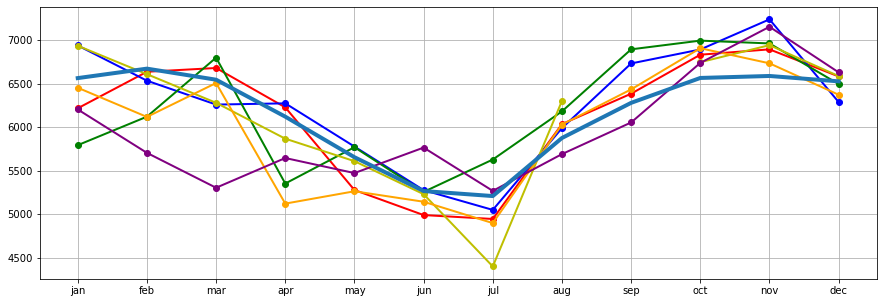

In [30]:
plt.plot(tabela_comp.loc[2014,:],color='r',linewidth=2.0, marker='o')
plt.plot(tabela_comp.loc[2015,:],color='b',linewidth=2.0, marker='o')
plt.plot(tabela_comp.loc[2016,:],color='g',linewidth=2.0, marker='o')
plt.plot(tabela_comp.loc[2017,:],color='y',linewidth=2.0, marker='o')
plt.plot(tabela_comp.loc[2018,:],color='orange',linewidth=2.0, marker='o')
plt.plot(tabela_comp.loc[2019,:],color='purple',linewidth=2.0, marker='o')
plt.plot(tabela_comp.loc['Predição',:],linewidth=4.0)
plt.gcf().set_size_inches(15, 5)
plt.grid()

In [31]:
tabela_comp2 = pd.DataFrame(tabela_comp)
tabela_comp2.drop('Predição', inplace=True)
tabela_comp2 = tabela_comp2.mean() 
tabela_comp.loc['Média'] = tabela_comp2
tabela_comp.loc['CRESESB'] = [6.02,6.03,6.08,5.56,5.08,4.66,4.77,5.57,5.97,6.11,6.27,5.97]
tabela_comp.loc['CRESESB'] = tabela_comp.loc['CRESESB']*1000
tabela_comp

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
2014,6216.02,6635.93,6679.17,6226.61,5276.37,4988.37,4943.4,6034.23,6383.74,6832.08,6893.56,6582.06
2015,6938.27,6533.36,6258.67,6272.86,5775.98,5275.01,5047.69,5988.5,6731.55,6892.14,7238.48,6287.49
2016,5791.87,6119.66,6798.04,5350.82,5768.39,5254.38,5626.77,6180.67,6893.84,6993.9,6961.63,6494.53
2017,6934.83,6608.26,6278.95,5866.48,5608.12,5228.56,4397.61,6300.88,NaN,6745.88,6941.76,6585.95
2018,6452.26,6116.88,6506.43,5120.01,5261.88,5141.63,4895.99,6028.4,6433.42,6906.68,6732.96,6371.61
2019,6202.81,5703.63,5302.35,5644.14,5471.16,5764.04,5266.26,5689.29,6053.07,6737.67,7153.17,6629.1
Predição,6563.09,6671.83,6544.54,6119.73,5653.65,5264.37,5206.88,5874.52,6278.62,6564.78,6587.49,6525.69
Média,6422.68,6286.29,6303.93,5746.82,5526.98,5275.33,5029.62,6036.99,6499.12,6851.39,6986.93,6491.79
CRESESB,6020,6030,6080,5560,5080,4660,4770,5570,5970,6110,6270,5970


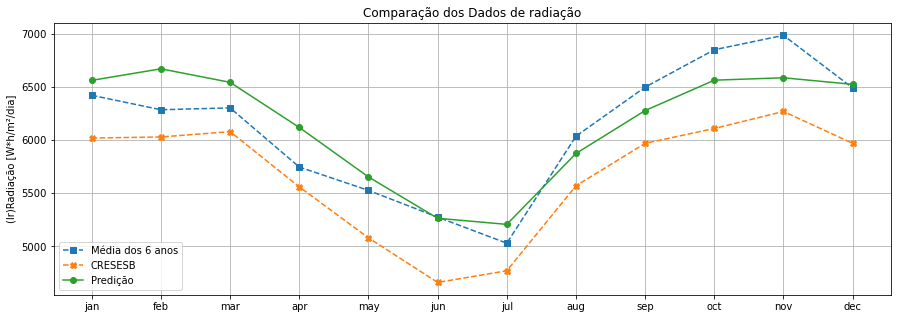

In [32]:
plt.plot(tabela_comp.loc['Média'],'--s',label='Média dos 6 anos')
plt.plot(tabela_comp.loc['CRESESB'],'--X',label='CRESESB')
plt.plot(tabela_comp.loc['Predição'], marker = 'o',label='Predição')
plt.grid()
plt.legend()
plt.ylabel('(Ir)Radiação [W*h/m²/dia]')
plt.title('Comparação dos Dados de radiação')
plt.gcf().set_size_inches(15, 5)

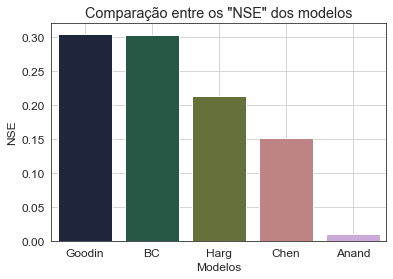

In [600]:
import seaborn as sns

tabela_erros = tabela_erros.reindex(['Goodin','BC','Harg','Chen','Anand'])

sns.set_palette("cubehelix")
sns.set_context(font_scale=12,rc={"font.size":12,"axes.labelsize":12})
sns.set_style("white")
plot= sns.barplot(x=tabela_erros.index,y='NSE',data=tabela_erros)
plt.xlabel("Modelos")
plt.ylabel("NSE")
plt.title('Comparação entre os "NSE" dos modelos') 
plt.grid()
plt.show(plot)

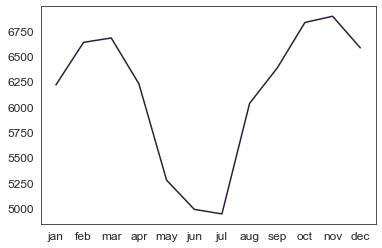

In [578]:
plt.plot(tabela_comp.iloc[0])

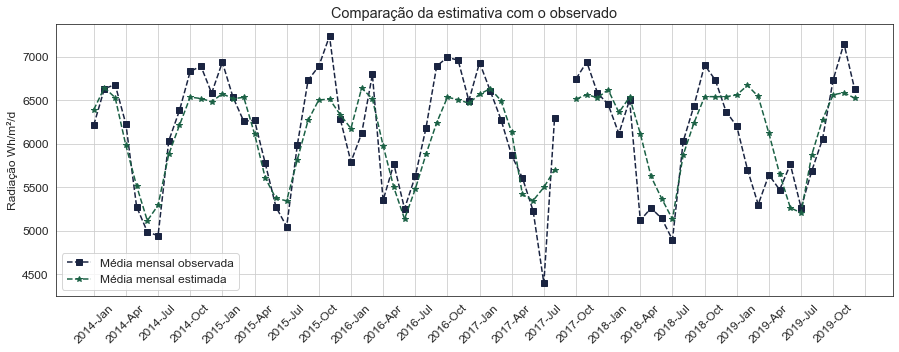

In [603]:
hlk = pd.concat([tabela_comp.iloc[0],tabela_comp.iloc[1],tabela_comp.iloc[2],tabela_comp.iloc[3],tabela_comp.iloc[4],tabela_comp.iloc[5]])
hlk = hlk.reset_index()
hlk.drop('index',axis=1,inplace=True)
hlj = pd.DataFrame(yGoodin*dff.Ho.values)
hlj = hlj.groupby(hlj.index.strftime('%y-%m')).mean()
hlj = hlj.reset_index()
hlj.drop('index',axis=1,inplace=True)
hlj_row = pd.DataFrame([np.nan],index=[44])
hlj = pd.concat([hlj,hlj_row]).sort_index()
hlj.index = np.arange(0,72)
plt.plot(hlk,'--s',label='Média mensal observada')
plt.plot(hlj,'--*',label='Média mensal estimada')
plt.grid()
plt.gcf().set_size_inches(15, 5)
xticks = pd.date_range(start='2014-01', end='2020', freq='3m')
xticks = xticks.strftime('%Y-%b')
plt.xticks(np.arange(0, 72, step=1))
plt.xticks(np.arange(0,73,3), list(xticks),rotation=45)
plt.title('Comparação da estimativa com o observado')
plt.legend()
plt.ylabel('Radiação Wh/m²/d')
plt.show()

In [612]:
testepr2 = pd.DataFrame(hlk).T.append(hlj.T).T
testepr2.columns = ['A','B']
r2_score(testepr2.dropna().A,testepr2.dropna().B)

0.6462675455811164

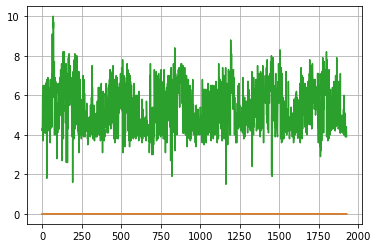

In [59]:
plt.plot(np.arange(len(Min)),Min.values)
plt.plot(np.arange(len(Min)),Max.values)
plt.plot(np.arange(len(Min)),dff.dT)
plt.grid()

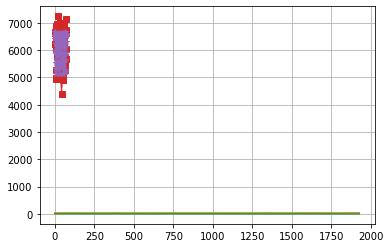

In [37]:

plt.plot(np.arange(len(Min)),Min.values)
plt.plot(np.arange(len(Min)),Max.values)
plt.plot(np.arange(len(Min)),dff.dT)
plt.plot(hlk,'--s',label='Média mensal observada')
plt.plot(hlj,'--*',label='Média mensal estimada')
plt.grid()

In [46]:
Max.index=pd.to_datetime(Max.index, format = '%y-%m-%d')

In [47]:
hlk = Min
hlk = hlk.reset_index()
hlk.drop('index',axis=1,inplace=True)
hlj = Max
hlj = Max.groupby(Max.index.strftime('%y-%m')).mean()
hlj = Max.reset_index()
hlj.drop('index',axis=1,inplace=True)
hlj_row = pd.DataFrame([np.nan],index=[44])
hlj = pd.concat([hlj,hlj_row]).sort_index()
hlj.index = np.arange(0,72)
plt.plot(hlk,'--s',label='Média mensal observada')
plt.plot(hlj,'--*',label='Média mensal estimada')
plt.grid()
plt.gcf().set_size_inches(15, 5)
xticks = pd.date_range(start='2014-01', end='2020', freq='3m')
xticks = xticks.strftime('%Y-%b')
plt.xticks(np.arange(0, 72, step=1))
plt.xticks(np.arange(0,73,3), list(xticks),rotation=45)
plt.title('Comparação da estimativa com o observado')
plt.legend()
plt.ylabel('Radiação Wh/m²/d')
plt.show()

ValueError: Length mismatch: Expected axis has 1928 elements, new values have 72 elements

In [42]:
Max

,TempOut
14-01-01,30.2
14-01-02,30.4
14-01-03,30.3
14-01-04,30.2
14-01-05,30.4
...,...
19-12-27,30.5
19-12-28,30.6
19-12-29,30.8
19-12-30,31.1


In [582]:
display(1-((1-200)**2+(2-1000)**2+(3-3100)**2)/((1-2)**2+(2-2)**2+(3-2)**2))
he.nse(gg.b.values,gg.a.values)

-5313506.0

NameError: name 'gg' is not defined

In [ ]:
# pd.concat([yWeiss,dff.KT],axis=1)
plt.scatter(np.arange(0,len(yWeiss)/10,0.1),yWeiss*dff.Ho,alpha=0.4,color='r')
#plt.plot(np.arange(0,len(yWeiss)/10,0.1),dff.H,alpha=0.4)

### A baixo teste importante que vamos analisar

In [ ]:
p=pd.DataFrame(dff)
p['KT']=p['KT'].round(2)
p.sort_values(by='KT',inplace=True)
p.index=p.KT
p

In [ ]:
#0-0.2
display(p[0.05:0.2].shape)
display('---')
#0.2-0.3
display(p[0.2:0.26].shape)
display(p[0.26:0.3].shape)
display('---')
#0.3-0.4
display(p[0.3:0.32].shape)
display(p[0.32:0.34].shape)
display(p[0.34:0.36].shape)
display(p[0.36:0.38].shape)
display(p[0.38:0.4].shape)
display('---')
#0.4-0.5
display(p[0.4:0.41].shape)
display(p[0.41:0.42].shape)
display(p[0.42:0.43].shape)
display(p[0.43:0.44].shape)
display(p[0.44:0.45].shape)
display(p[0.45:0.46].shape)
display(p[0.46:0.47].shape)
display(p[0.47:0.48].shape)
display(p[0.48:0.49].shape)
display(p[0.49:0.5].shape)
############
display(p[0.5:0.6].shape)
display(p[0.6:0.7].shape)
display(p[0.7:0.8].shape)

In [ ]:
a0=p[0:0.2]

plt.scatter(p[0:0.2].dT,p[0:0.2].KT)

a=p[0.21:0.26].sample(7)
plt.scatter(a.dT,a.KT)
b=p[0.26:0.3].sample(7)
plt.scatter(b.dT,b.KT)

c=p[0.31:0.32].sample(3)
plt.scatter(c.dT,c.KT)
d=p[0.33:0.34].sample(3)
plt.scatter(d.dT,d.KT)
e=p[0.35:0.36].sample(3)
plt.scatter(e.dT,e.KT)
f=p[0.37:0.38].sample(3)
plt.scatter(f.dT,f.KT)
g=p[0.39:0.4].sample(3)
plt.scatter(g.dT,g.KT)

h=p[0.41:0.42].sample(3)
plt.scatter(h.dT,h.KT)
i=p[0.43:0.44].sample(3)
plt.scatter(i.dT,i.KT)
j=p[0.45:0.46].sample(3)
plt.scatter(j.dT,j.KT)
k=p[0.47:0.48].sample(3)
plt.scatter(k.dT,k.KT)
l=p[0.49:0.5].sample(3)
plt.scatter(l.dT,l.KT)

m=p[0.51:0.52].sample(3)
plt.scatter(m.dT,m.KT)
n=p[0.52:0.53].sample(3)
plt.scatter(n.dT,n.KT)
o=p[0.54:0.55].sample(3)
plt.scatter(o.dT,o.KT)
q=p[0.56:0.57].sample(3)
plt.scatter(q.dT,q.KT)
r=p[0.58:0.6].sample(3)
plt.scatter(r.dT,r.KT)

#s=p[0.61:0.62].sample(3)
#plt.scatter(s.dT,s.KT)
#t=p[0.62:0.63].sample(3)
#plt.scatter(t.dT,t.KT)
#u=p[0.64:0.65].sample(3)
#plt.scatter(u.dT,u.KT)
#v=p[0.66:0.67].sample(3)
#plt.scatter(v.dT,v.KT)
#w=p[0.68:0.7].sample(3)
#plt.scatter(w.dT,w.KT)

#a1=p[0.71:0.72].sample(3)
#plt.scatter(a1.dT,a1.KT)
#b1=p[0.72:0.73].sample(3)
#plt.scatter(b1.dT,b1.KT)
#c1=p[0.74:0.75].sample(3)
#plt.scatter(c1.dT,c1.KT)

#z=pd.concat([a0,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,q,r,s,t,u,v,w,a1,b1,c1])
z=pd.concat([a0,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,q,r])
#z=pd.concat([a0,a,b,c,d,e,f,g,h,i,j,k,l])
z.index=np.arange(len(z.dT))
#z.dT=z.dT.replace(10,2)
g1=[0.4,1,3]

n1= len(z.dT)
y1= np.empty(n1)

from scipy.optimize import curve_fit

c2,cov = curve_fit(KTBC,z.dT,z.KT,g1)

for i1 in range (n1):
    y1[i1]=KTBC(z.dT[i1],c2[0],c2[1],c2[2])

plt.scatter(z.dT,z.KT,color='r')
plt.scatter(z.dT,y1,color='b')
plt.grid()
plt.show()

#plt.plot(KTBC(np.arange(0,100,0.1),c2[0],c2[1],c2[2]))
#plt.show()

plt.scatter(z.H*3600/10**6,y1*z.Ho*3600/10**6)
plt.xlim(5,25)
plt.ylim(5,25)
plt.show()

print(r2_score(z.KT,y1).round(2))
print(r2_score(z.H,y1*z.Ho).round(2))

In [ ]:
dff.sort_values(by='KT').set_index(['KT'])[0:0.3]

In [ ]:
pd.read_excel()

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx